# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 1. Нейронные сети.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 60 баллов
* **Остальные задачи будут выложены в части 2 с отдельным дедлайном.**

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad4_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
%pip install torch

In [ ]:
%pip install torchvision

In [1]:
from typing import Tuple
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets import MNIST

from torch import nn
from IPython.display import clear_output

from time import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Допишите сюда необходимые импорты

---
### <font color="blue"><i>Легкая часть</i></font>

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 1.

**При решении данной задачи можно использовать ИИ-инструменты только для построения графиков и оформления документаций к коду.**

Обратимся вновь к уже знакомому нам <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">по первому занятию</a> датасету **MNIST**. Как вы помните, этот набор данных содержит изображения рукописных цифр, каждое из которых имеет размер **28x28**. Всего в датасете содержится **60 000** изображений в обучающей выборке и еще **10 000** — в тестовой.

На первом занятии мы работали с сокращенной версией этого датасета, содержащей **1797** изображений размером **8x8**.

В этой домашней работе мы выберем более "сложный" вариант, а именно:

* вернемся к исходной версии датасета с изображениями размером **28x28**,
* сожмем изображения в два раза по каждой из размерностей, то есть до **14x14**,
* оставим **10 000** изображений в обучающей выборке.

> *Примечание.* При желании вы можете усложнить задачу &mdash; отказаться от сжатия изображений и/или увеличить количество данных. Однако учтите, что в таком случае модели будут работать дольше, и, возможно, вам будет сложнее достичь желаемых результатов.

**Наша задача остается прежней:** *по изображению определить, какая цифра на нем нарисована.*
На этот раз мы будем решать ее с помощью простых нейронных сетей. Также мы заглянем "под капот" нейросетей, чтобы лучше понять процесс их обучения.

> *Примечание.* Обычно подобные задачи, связанные с изображениями, решаются с помощью сверточных нейронных сетей, которые лучше подходят для работы с изображениями. Они станут темой нашего следующего занятия, ждем всех!

Ниже представлена готовая функция для загрузки и предварительной обработки данных.
В рамках этой функции мы выполняем следующие шаги.
* Загрузка исходных данных.
* Сохранение **10 000** изображений в качестве обучающей выборки.
* Сжатие изображений в два раза по каждой из осей, что приводит к размеру **14x14**..
* Растягиваем изображение размером **14x14** в вектор длиной $14 \cdot 14 = 196$. Более подробно эта операция описана <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">в первой лекции</a>.

In [5]:
def load_mnist(
    train_size: int = 10000, target_size: int = 14
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Загружает и подготавливает данные MNIST для обучения и тестирования.

    Параметры:
    train_size (int): Количество обучаемых данных. По умолчанию 6000.
    target_size (int): Размер, до которого уменьшаются изображения. По умолчанию 14.

    Возвращает:
    train_images (torch.Tensor): Тензор с изображениями для обучения.
    train_labels (torch.Tensor): Тензор с метками для обучения.
    test_images (torch.Tensor): Тензор с изображениями для тестирования.
    test_labels (torch.Tensor): Тензор с метками для тестирования.

    Данные загружаются из набора MNIST, нормализуются, уменьшаются в
    размере и преобразуются в векторы. Для обучения используется только
    часть (train_fraction) от исходного набора данных.
    """

    PIXEL_MAX_VALUE = 255.0  # Для нормализации значений пикселей

    # Создаем преобразование для данных: конвертируем изображения в тензоры PyTorch
    transform = transforms.Compose(
        [
            # Преобразует изображение в тензор и нормализует значения в диапазоне [0, 1]
            transforms.ToTensor(),
        ]
    )

    # Загружаем обучающий и тестовый наборы данных MNIST
    train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = MNIST(root="./data", train=False, transform=transform, download=True)

    # Выбираем часть обучающего набора данных
    train_indices = np.random.choice(len(train_dataset), train_size, replace=False)

    # Преобразуем изображения в тензоры и нормализуем их, деля на PIXEL_MAX_VALUE
    train_images = train_dataset.data[train_indices].unsqueeze(1).float() / PIXEL_MAX_VALUE
    test_images = test_dataset.data.unsqueeze(1).float() / PIXEL_MAX_VALUE

    # Уменьшаем размер изображений до target_size x target_size с использованием билинейной интерполяции
    train_images = torch.nn.functional.interpolate(
        train_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )
    test_images = torch.nn.functional.interpolate(
        test_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )

    # Преобразуем изображения в векторы (разворачиваем в одномерные массивы)
    train_images = train_images.view(train_size, -1)
    test_images = test_images.view(len(test_dataset), -1)

    # Получаем метки для выбранных обучающих и всех тестовых данных
    train_labels = train_dataset.targets[train_indices]
    test_labels = test_dataset.targets

    return train_images, train_labels, test_images, test_labels

Загрузим данные и посмотрим на их размерности

In [104]:
train_images, train_labels, test_images, test_labels = load_mnist()

print("Train:", train_images.shape, train_labels.shape)
print("Test:", test_images.shape, test_labels.shape)

Train: torch.Size([10000, 196]) torch.Size([10000])
Test: torch.Size([10000, 196]) torch.Size([10000])


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7511c0781e8d08a269da6c1d50d763d9 -->
**1.** Используя `Sequential` подход в PyTorch, напишите модель нейронной сети по следующему описанию.

* **Вход**: изображение в виде вектора.
* **Два линейных слоя** с промежуточной размерностью 64.
* **Функция активации**: между линейными слоями используется `ReLU`, а на выходе второго слоя — отсутствует (или используется тождественная функция).
* **Выход**: вектор логитов размером 10, соответствующий количеству классов.

> Эта нейронная сеть для изображения $x$ оценивает вектор логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ принадлежности к каждому из классов, аналогично логистической регрессии. Имея оценку логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ , можно получить оценку вероятности $p_k$ для каждого класса по следующей формуле, используя softmax-функцию (обобщение логистической сигмоиды)
> $$
\widehat{p}_k(x) = \frac{\exp\left(\widehat{\ell}(x)\right)}{\exp\left(\widehat{\ell}_0(x)\right) +... + \exp\left(\widehat{\ell}_9(x)\right)},
$$
> которая реализуется с помощью функции `nn.functional.softmax(..., dim=-1)`. В качестве оценки класса можно взять класс с наибольшей вероятностью, что можно реализовать с помощью метода `argmax(axis=...)` у тензора в PyTorch.

In [155]:
# собираем модули в последовательность
model = nn.Sequential(
    nn.Linear(in_features=196, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10),
)

model

Sequential(
  (0): Linear(in_features=196, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a0e6b216258fdc0b22b7276d9527dea6 -->
**2.** **Напишите цикл обучения нейросети**, используя кросс-энтропию `nn.CrossEntropyLoss()` качестве лосс-функции. Это обобщение бинарной кросс-энтропии, которую мы рассматривали на лекции по логистической регрессии. Ее реализация в PyTorch принимает на вход логиты (что и возвращает наша нейросеть) и истинные метки классов. Обучайте сеть на полном наборе данных с помощью метода градиентного спуска `torch.optim.SGD`, не разбивая данные на случайные батчи (как это делается в SGD).


Примерно каждые 5-10 итераций выполняйте следующие действия:

* Получите текущие предсказания классов для обучающей и тестовой выборок.
* Посчитайте точность классификации для этих выборок.
* Постройте график зависимости точности классификации от номера итерации. Перед построением графика используйте `clear_output(wait=True)` для плавной очистки холста.
* Сохраните следующие значения:
    * Значение лосс-функции.
    * Точность классификации для обучающей и тестовой выборок.
    * Матрицы весов для каждого слоя.

*Замечания:*
* Рекомендуем сохранять данные в заранее подготовленный словарь, ключи которого соответствуют именам переменных (например, `"weights_layer_2"`), а значения словаря представляют собой списки значений этих переменных по итерациям.
* При сохранении не забывайте вызывать метод `.detach().numpy()` для преобразования матриц в массивы numpy. Также может потребоваться заново инициализировать матрицы с помощью `np.array(...)`, чтобы сохранить сами матрицы, а не ссылки на них, по которым значения меняются в процессе обучения сети.

Выполните 10 000 итераций обучения. Сколько времени это заняло?

In [156]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
optim_func = nn.CrossEntropyLoss()

In [157]:
X_train, y_train, X_test, y_test = train_images, train_labels, test_images, test_labels

In [158]:
# Словарь для сохранения результатов
results = {
    "loss": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "weights_layer_1": [],
    "weights_layer_2": [],
}

In [159]:
def show_progress(results):
    clear_output(wait=True)  # Очистка предыдущего вывода для плавного обновления
    plt.style.use('ggplot')  # Использование стиля 'ggplot' для графиков

    # Извлечение данных для построения графика
    train_accuracy = results["train_accuracy"]  # Точность на тренировочной выборке
    test_accuracy = results["test_accuracy"]    # Точность на тестовой выборке
    iterations = range(len(train_accuracy))    # Номера итераций

    # Создание графика
    plt.figure(figsize=(12, 6))

    # Построение графика точности на тренировочной выборке
    plt.scatter(iterations, train_accuracy, label="Тренировочная выборка", marker=".")

    # Построение графика точности на тестовой выборке
    plt.scatter(iterations, test_accuracy, label="Тестовая выборка", marker=".")

    # Настройка осей и заголовка
    plt.xlabel("Итерация")
    plt.ylabel("Точность")
    plt.title("Зависимость точности от итерации")
    plt.legend()  # Добавление легенды
    plt.grid(True)  # Включение сетки

    # Установка пределов оси X для лучшей визуализации
    plt.xlim(-10, 10000)

    # Отображение графика
    plt.show()

    

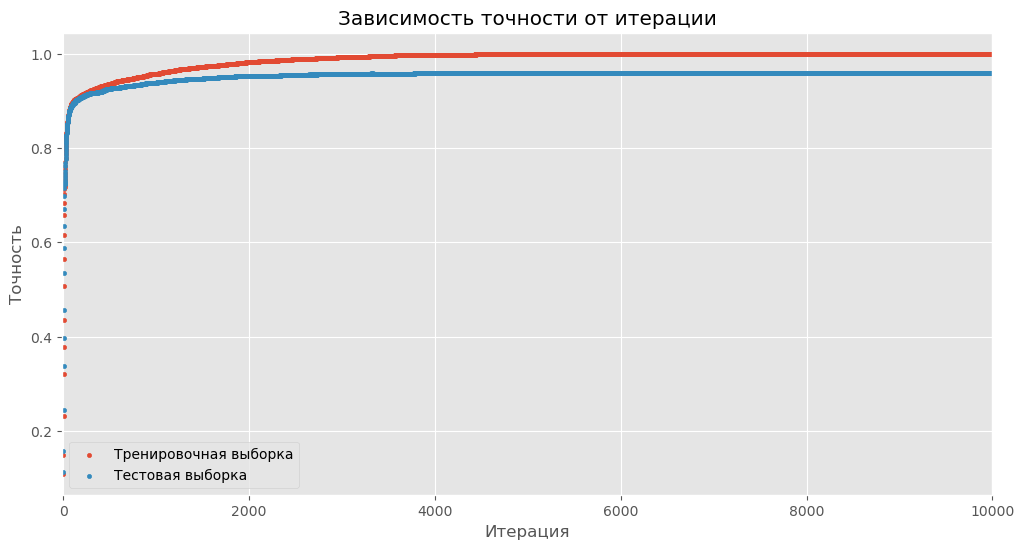

Обучение заняло 452 секунд


In [160]:
# Количество итераций обучения
num_iter = 10_000

start_time = time()

# Основной цикл обучения

for i in range(num_iter):
    # Прямой проход (forward pass) для тренировочной выборки
    y_pred_logits_train = model(X_train)  # Логиты для тренировочной выборки
    y_pred_train = torch.nn.functional.softmax(y_pred_logits_train, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Прямой проход (forward pass) для тестовой выборки
    y_pred_logits_test = model(X_test)  # Логиты для тестовой выборки
    y_pred_test = torch.nn.functional.softmax(y_pred_logits_test, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Вычисление функции потерь (например, кросс-энтропия)
    loss = optim_func(y_pred_logits_train, y_train)

    # Сохранение результатов текущей итерации
    results["loss"].append(loss.item())  # Значение функции потерь
    results["test_accuracy"].append(accuracy_score(y_test, y_pred_test))  # Точность на тестовой выборке
    results["train_accuracy"].append(accuracy_score(y_train, y_pred_train))  # Точность на тренировочной выборке
    results["weights_layer_1"].append(model[0].weight.data.detach().numpy().copy())  # Веса первого слоя
    results["weights_layer_2"].append(model[2].weight.data.detach().numpy().copy())  # Веса второго слоя

    # Обратный проход (backward pass): вычисление градиентов
    loss.backward()

    # Обновление параметров модели с использованием оптимизатора
    optimizer.step()

    # Зануление градиентов для следующей итерации
    optimizer.zero_grad()

    # Визуализация прогресса каждые 10 итераций
    if (i + 1) % 10 == 0:
        show_progress(results)

end_time = time()

print(f"Обучение заняло {int(end_time - start_time)} секунд")



Проверьте себя, точность классификации на тестовой выборке должна быть около $90\%$. Если вы получили значительно меньший результат (менее $85\%$), попробуйте явно инициализировать веса сети и настроить разные значения learning_rate для разных параметров (посмотрите примеры с занятия). Если эти меры не помогут, то стоит поискать ошибку. Да, обучение нейронных сетей — это непростой процесс.

In [123]:
print(f"Точность классификации на тестовой выборке {results["test_accuracy"][-1] * 100}%")
print(f"Точность классификации на тренировочной выборке {results["train_accuracy"][-1] * 100}%")

Точность классификации на тестовой выборке 95.93%
Точность классификации на тренировочной выборке 100.0%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 50631d10e9d4fcecb3da59913ebde5b7 -->
**3.** Теперь самое интересное &mdash; заглянем под капот нашей нейросети!

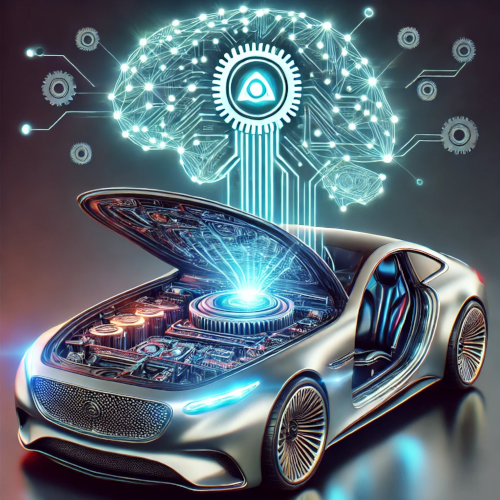

Для более глубокого понимания работы нейросети **визуализируем матрицы весов** для нескольких итераций обучения. Тем самым, вы сможете оценить, как меняется поведение модели в процессе обучения.

1. Выберите примерно 10 итераций обучения, включая первую и последнюю.
2. Для каждого слоя настройте график, используя предоставленный шаблон.

Обратите внимание, что для корректной визуализации матрицы весов ее необходимо **транспонировать**. Например, для первого слоя вертикальная ось должна соответствовать входу сети, а горизонтальная — промежуточной размерности.

В качестве цветовой палитры выбрана `"RdBu"`, что позволяет отображать положительные числа матрицы красным цветом, а отрицательные — синим. Чтобы достичь этого, также **необходимо установить параметры `vmin` и `vmax`** симметрично относительно нуля, чтобы нули отображались белым цветом. Подберите эти значения таким образом, чтобы получить наиболее четкую картинку, на которой выделяются определенные группы пикселей.

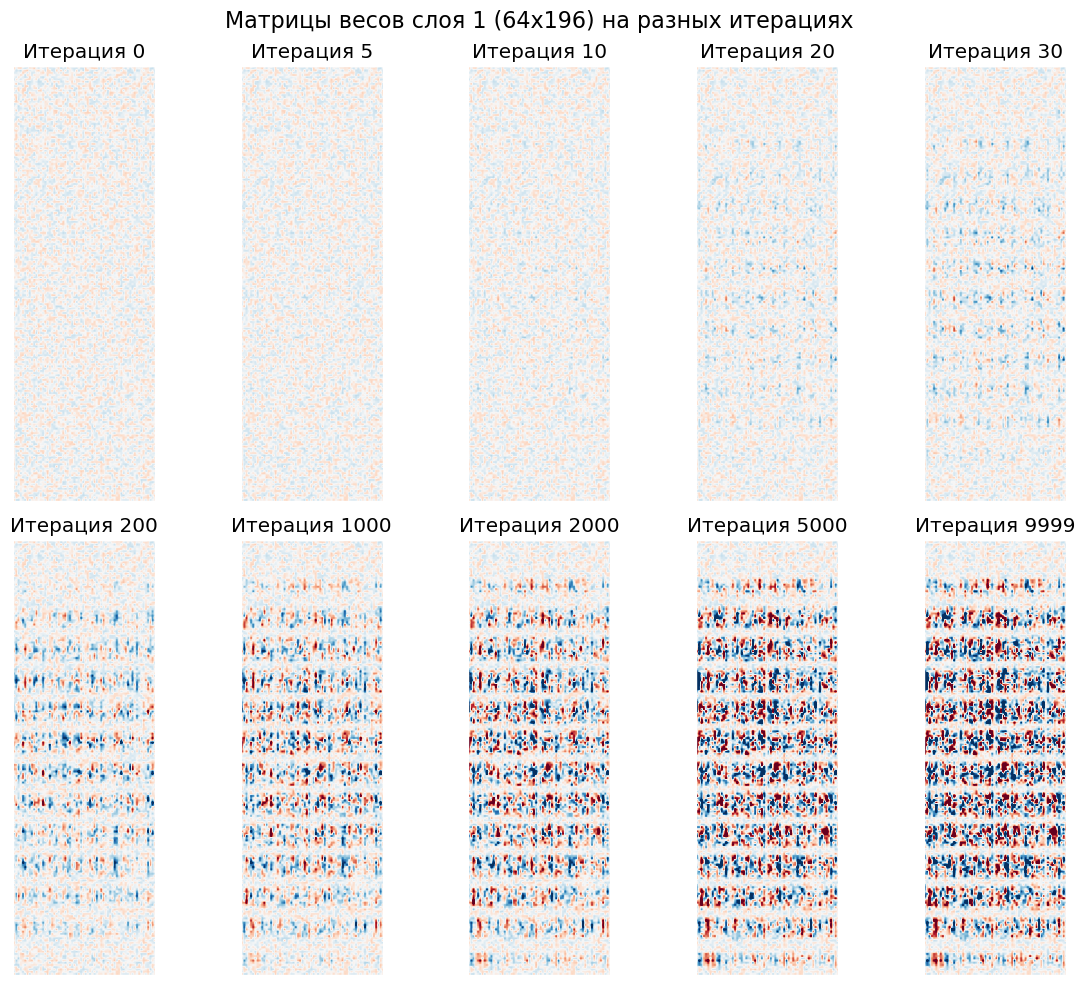

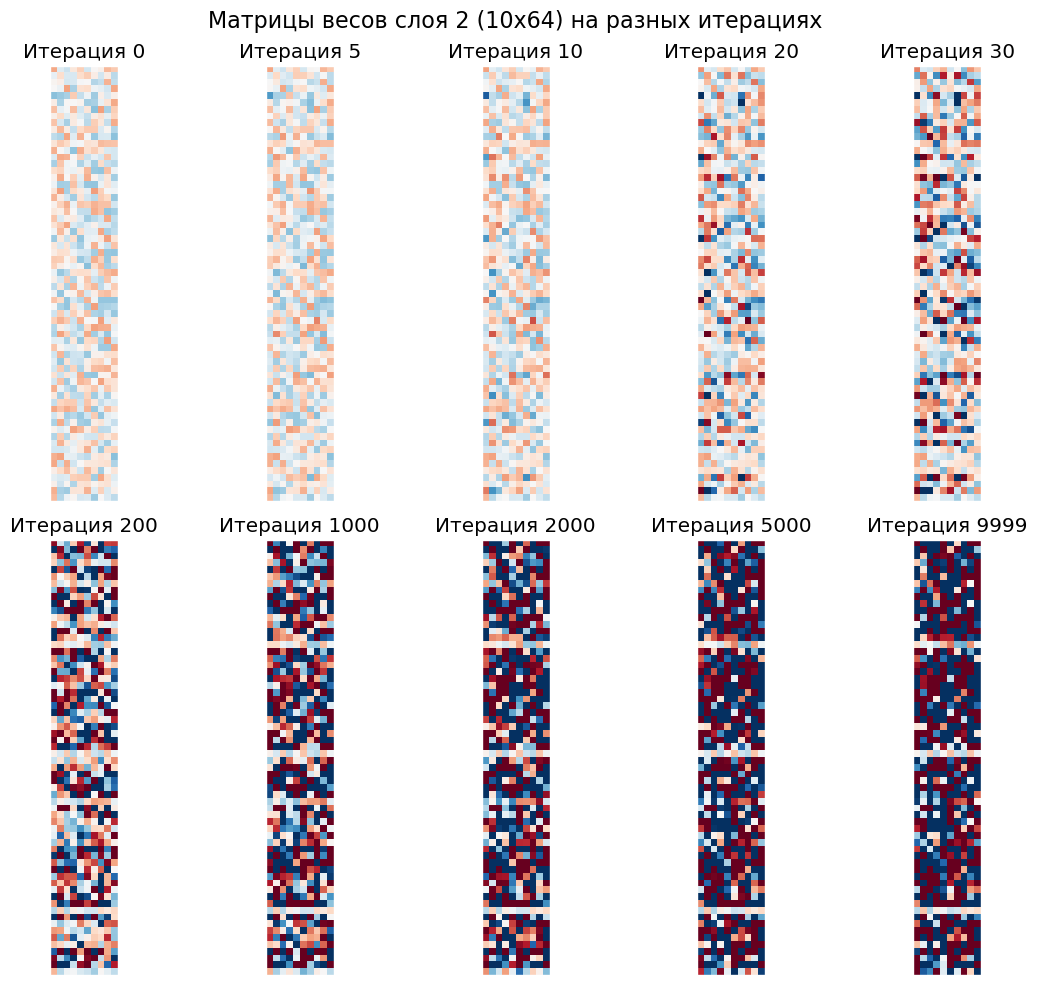

In [174]:
# Выберем 10 итераций, включая первую и последнюю
selected_iterations = [0, 5, 10, 20, 30, 200, 1000, 2000, 5000, 9999]

# Функция для визуализации матриц весов
def plot_weights(weights, layer_name, selected_iterations, vmin, vmax):
    plt.figure(figsize=(12, 10))
    for i, iteration in enumerate(selected_iterations):
        plt.subplot(2, 5, i + 1)  # 2 строки, 5 столбцов для 10 итераций
        plt.imshow(weights[iteration].T, cmap="RdBu", vmin=vmin, vmax=vmax)  # Транспонируем матрицу
        plt.title(f"Итерация {iteration}")
        plt.xticks([])  # Убираем метки оси X
        plt.yticks([])  # Убираем метки оси Y
    plt.suptitle(f"Матрицы весов слоя {layer_name} на разных итерациях", fontsize=16)
    plt.tight_layout()
    plt.show()

# Определим диапазон значений для цветовой палитры
vmin = -0.3  # Минимальное значение
vmax = 0.3   # Максимальное значение

# Визуализация весов первого слоя
plot_weights(results["weights_layer_1"], "1 (64x196)", selected_iterations, vmin, vmax)

# Визуализация весов второго слоя
plot_weights(results["weights_layer_2"], "2 (10x64)", selected_iterations, vmin, vmax)

Какие выводы можно сделать, основываясь на полученных визуализациях? 
Подумайте, почему на больших итерациях для первого слоя начинают выделяться определенные пиксели? Почему именно эти пиксели? 

*Подсказка: вспомните, как устроены входные изображения цифр, с которыми мы работаем.*

**Ответ:**

На начальных итерациях значения на графике разбросаны, но потом при увеличении итераций начинают выделяться цветом определенные пиксели, это связано с тем что модель выделяет существенные признаки для предсказания.  
Выделяются именно определенные пиксели, так как цифра распределена преимущественно в некоторой области картинки, по краям расположены белые участки, а участки которые позволяют различать цифры находятся преимущественно около центра.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0db56d0ce9aedf85256c3f57f6ef20b0 -->
Попробуйте **улучшить точность классификации**, рассмотрев больше нейронов в промежуточном слое.

In [119]:
# Увеличим количество нейронов в промежуточном слое до 128
model1 = nn.Sequential(
    nn.Linear(in_features=196, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=10),
)

model1

Sequential(
  (0): Linear(in_features=196, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [120]:
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.5)
optim_func1 = nn.CrossEntropyLoss()

In [121]:
results1 = {
    "loss": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "weights_layer_1": [],
    "weights_layer_2": [],
}

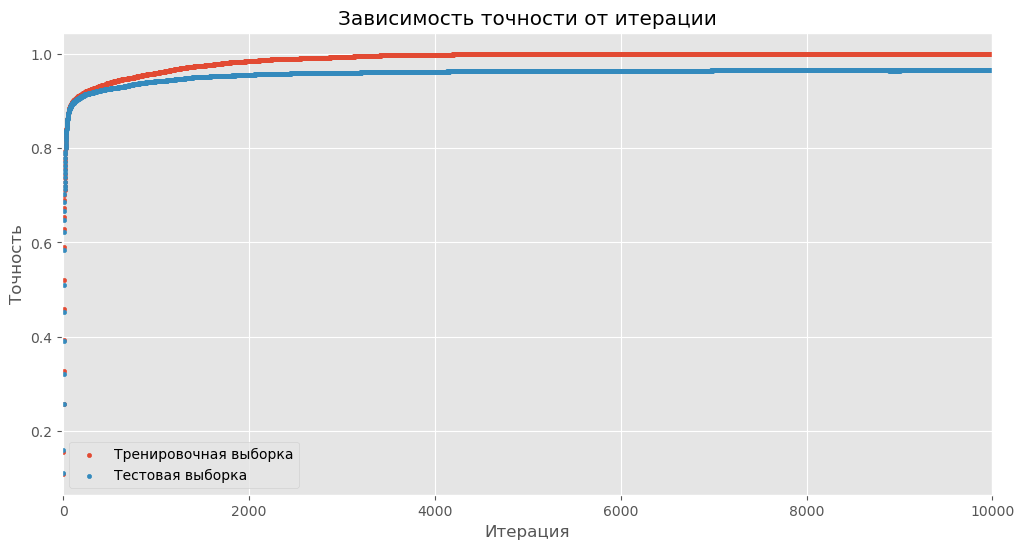

Обучение заняло 527 секунд


In [122]:
# Количество итераций обучения
num_iter = 10_000

start_time = time()

# Основной цикл обучения

for i in range(num_iter):
    # Прямой проход (forward pass) для тренировочной выборки
    y_pred_logits_train = model1(X_train)  # Логиты для тренировочной выборки
    y_pred_train = torch.nn.functional.softmax(y_pred_logits_train, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Прямой проход (forward pass) для тестовой выборки
    y_pred_logits_test = model1(X_test)  # Логиты для тестовой выборки
    y_pred_test = torch.nn.functional.softmax(y_pred_logits_test, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Вычисление функции потерь (например, кросс-энтропия)
    loss = optim_func1(y_pred_logits_train, y_train)

    # Сохранение результатов текущей итерации
    results1["loss"].append(loss.item())  # Значение функции потерь
    results1["test_accuracy"].append(accuracy_score(y_test, y_pred_test))  # Точность на тестовой выборке
    results1["train_accuracy"].append(accuracy_score(y_train, y_pred_train))  # Точность на тренировочной выборке
    results1["weights_layer_1"].append(model1[0].weight.data.detach().numpy())  # Веса первого слоя
    results1["weights_layer_2"].append(model1[2].weight.data.detach().numpy())  # Веса второго слоя

    # Обратный проход (backward pass): вычисление градиентов
    loss.backward()

    # Обновление параметров модели с использованием оптимизатора
    optimizer1.step()

    # Зануление градиентов для следующей итерации
    optimizer1.zero_grad()

    # Визуализация прогресса каждые 10 итераций
    if (i + 1) % 10 == 0:
        show_progress(results1)

end_time = time()

print(f"Обучение заняло {int(end_time - start_time)} секунд")



In [124]:
print(f"Точность классификации на тестовой выборке {results1["test_accuracy"][-1] * 100}%")
print(f"Точность классификации на тренировочной выборке {results1["train_accuracy"][-1] * 100}%")

Точность классификации на тестовой выборке 96.48%
Точность классификации на тренировочной выборке 100.0%


Точность предсказания на тестовой выборке улучшилась на 0.6% по сравнению с прошлой моделью

Теперь попробуйте добавить к сети еще один слой.

In [141]:
# Добавим еще слой
model2 = nn.Sequential(
    nn.Linear(in_features=196, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10),
)

model2

Sequential(
  (0): Linear(in_features=196, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [142]:
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.5)
optim_func2 = nn.CrossEntropyLoss()

In [143]:
results2 = {
    "loss": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "weights_layer_1": [],  # Веса первого слоя (196x128)
    "weights_layer_2": [],  # Веса второго слоя (128x64)
    "weights_layer_3": [],  # Веса третьего слоя (64x10)
}

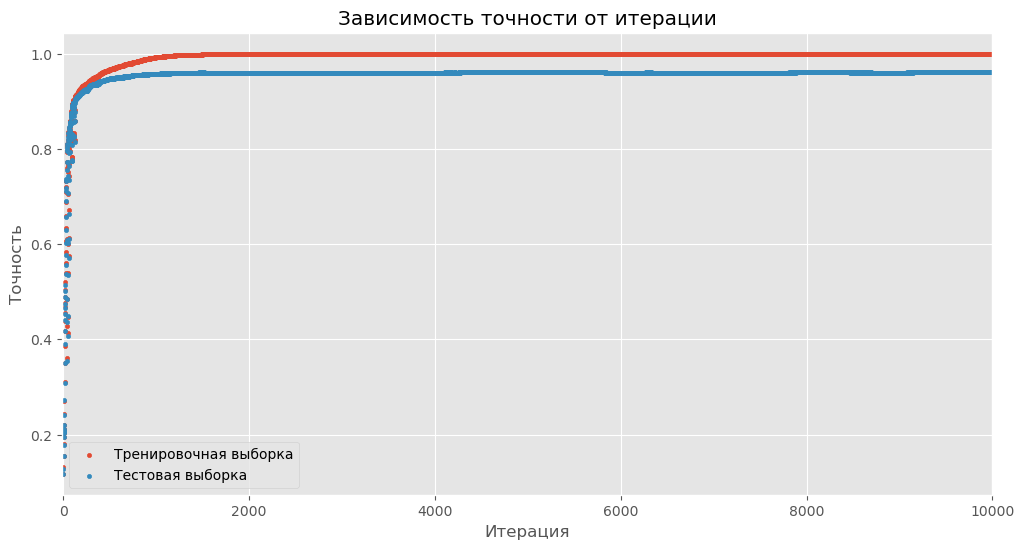

Обучение заняло 573 секунд


In [144]:
# Количество итераций обучения
num_iter = 10_000
start_time = time()

# Основной цикл обучения
for i in range(num_iter):
    # Прямой проход (forward pass) для тренировочной выборки
    y_pred_logits_train = model2(X_train)  # Логиты для тренировочной выборки
    y_pred_train = torch.nn.functional.softmax(y_pred_logits_train, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Прямой проход (forward pass) для тестовой выборки
    y_pred_logits_test = model2(X_test)  # Логиты для тестовой выборки
    y_pred_test = torch.nn.functional.softmax(y_pred_logits_test, dim=-1).argmax(axis=1)  # Предсказанные классы

    # Вычисление функции потерь (кросс-энтропия)
    loss = optim_func1(y_pred_logits_train, y_train)

    # Сохранение результатов текущей итерации
    results2["loss"].append(loss.item())  # Значение функции потерь
    results2["test_accuracy"].append(accuracy_score(y_test, y_pred_test))  # Точность на тестовой выборке
    results2["train_accuracy"].append(accuracy_score(y_train, y_pred_train))  # Точность на тренировочной выборке
    results2["weights_layer_1"].append(model2[0].weight.data.detach().numpy())  # Веса первого слоя
    results2["weights_layer_2"].append(model2[2].weight.data.detach().numpy())  # Веса второго слоя
    results2["weights_layer_3"].append(model2[4].weight.data.detach().numpy())  # Веса третьего слоя

    # Обратный проход (backward pass): вычисление градиентов
    loss.backward()

    # Обновление параметров модели с использованием оптимизатора
    optimizer2.step()

    # Зануление градиентов для следующей итерации
    optimizer2.zero_grad()

    # Визуализация прогресса каждые 10 итераций
    if (i + 1) % 10 == 0:
        show_progress(results2)

end_time = time()

print(f"Обучение заняло {int(end_time - start_time)} секунд")

In [145]:
print(f"Точность классификации на тестовой выборке {results1["test_accuracy"][-1] * 100}%")
print(f"Точность классификации на тренировочной выборке {results1["train_accuracy"][-1] * 100}%")

Точность классификации на тестовой выборке 96.48%
Точность классификации на тренировочной выборке 100.0%


Насколько дольше обучается нейросеть? Получилось ли улучшить качество?

**Ответ:**

Время обучения model1 увеличилось на 75 секунд по сравнению с model, в время обучения model2 увеличилось на 121 секуд по сравнению с model1.  
Качество обучения model1 и model2 получилось 96.48%. Добавление еще одного слоя в модель по сравнению с увеличением нейронов не улучшило точность модели, но ее обучение заняло на 46 секунд больше.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b3240ec0d2bdd17c426e5b24c03277bc -->
Сделайте выводы.

**Ответ:**

В данной работе были обучены модели для классификации цифр по картинке.  
Всего в работе использовалось 3 модели: двухслойная нейронная сеть с 64 промежуточными нейронами, двухслойная нейронная сеть со 128 промежуточными нейронами, трехслойная нейронная сеть со 128 и 64 промежуточными нейронами.  
Результаты первой модели: время обучения - 452 секунд, точность классификации на тестовой выборке - 95.93%.   
Результаты второй модели: время обучения - 527 секунд, точность классификации на тестовой выборке - 96.48%.    
Результаты первой модели: время обучения - 573 секунд, точность классификации на тестовой выборке - 96.48%.  
По графикам видно что точность модели быстро переваливает за 90% при обучении.  
Также по визуализации весов видно, что модель учится учитывать важные признаки для распознавания цифр.  




<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---

**Мы продолжим работу с нейросетями во второй части этого домашнего задания, которую вы можете сдать на неделю позже первой.**

Вы могли заметить, что качество наших моделей было не таким высоким, как можно было бы получить современными моделями. Тем не менее отметим, что сравнивать с моделью KNN, которую мы рассмотрели на первом занятии, было бы некорректно, так как там использовалась более простая выборка.

Обучение нейронных сетей — это довольно сложная задача. Чтобы глубокие сети обучались более стабильно, используются специальные технологии, изучение которых требует больших усилий. Например, на следующей лекции мы рассмотрим сверточные слои и другие подходы к созданию и обучению нейросетей для анализа изображений.
Полное погружение в мир нейросетей, включая самые современные архитектуры, ожидает вас на третьем курсе. Например, на DS-потоке будет порядка 14 лекций по этой теме.

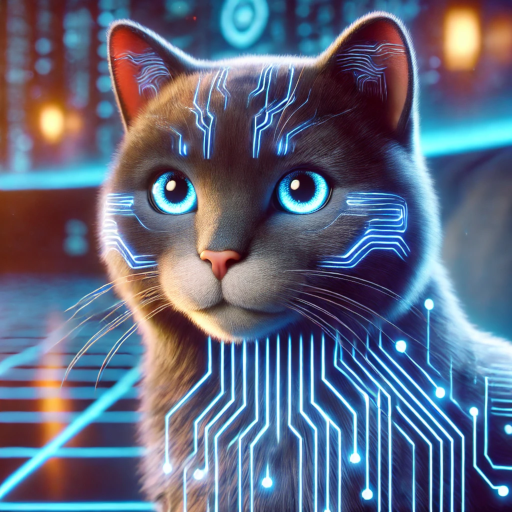